In [3]:
setwd('~/bme/jupyter_data')
sirv_info = read.csv('SIRV-sequence-design-overview-v1.2.csv', skip=6, fill=T, stringsAsFactors=FALSE)
sirv_info = sirv_info[substr(sirv_info[,6], 1, 4) == 'SIRV',]
kquant = read.table('abundance.tsv', header=T)
kquant$target_id = as.character(kquant$target_id)
sirv_info[,6] = as.character(sirv_info[,6])
kquant$sirv_e0 = sirv_info$E0[match(kquant$target_id, sirv_info[,6])]
kquant$sirv_e1 = sirv_info$E1[match(kquant$target_id, sirv_info[,6])]
kquant$sirv_e2 = sirv_info$E2[match(kquant$target_id, sirv_info[,6])]

kquant$sirv_e0 = rep(1, nrow(kquant))  # this data comes from an excel file that is poorly made for reading into R
kquant$sirv_e1[as.character(kquant$sirv_e1) == ' 1/4'] = 0.25
kquant$sirv_e1[as.character(kquant$sirv_e1) == ' 1/2'] = 0.5
kquant$sirv_e1[as.character(kquant$sirv_e1) == '2'] = 2
kquant$sirv_e1[as.character(kquant$sirv_e1) == '1'] = 1

kquant$sirv_e2[as.character(kquant$sirv_e2) == '  1/32'] = 1/32
kquant$sirv_e2[as.character(kquant$sirv_e2) == '  1/4 '] = 0.25
kquant$sirv_e2[as.character(kquant$sirv_e2) == '  1/2 '] = 0.5
kquant$sirv_e2[as.character(kquant$sirv_e2) == '1'] = 1
kquant$sirv_e2[as.character(kquant$sirv_e2) == '2'] = 2
kquant$sirv_e2[as.character(kquant$sirv_e2) == '4'] = 4
kquant[kquant$target_id == 'SIRV502',6:8] = c(1,2,1/32)

kquant$sirv_e0 = as.numeric(kquant$sirv_e0)
kquant$sirv_e1 = as.numeric(kquant$sirv_e1)
kquant$sirv_e2 = as.numeric(kquant$sirv_e2)

cor(kquant$est_counts, kquant$sirv_e0)
cor(kquant$est_counts, kquant$sirv_e1)
cor(kquant$est_counts, kquant$sirv_e2)
cor(kquant$tpm, kquant$sirv_e2)
head(kquant)
write.table(kquant, 'sirv_kallisto_quantified.txt', quote=F, row.names=F, sep='\t')


Warning message in cor(kquant$est_counts, kquant$sirv_e0):
"the standard deviation is zero"

[1] NA

[1] -0.1800045

[1] 0.300916

[1] 0.267794

target_id,length,eff_length,est_counts,tpm,sirv_e0,sirv_e1,sirv_e2
SIRV101,1555,966.489,1462.00000,171310.000,1,1.00,1.00
SIRV102,1296,707.489,217.11400,34753.600,1,0.50,0.25
SIRV103,1357,768.489,344.66500,50791.500,1,1.00,1.00
SIRV105,665,280.282,1.02438,413.903,1,0.25,4.00
SIRV106,970,398.740,0.00000,0.000,1,1.00,1.00
SIRV107,741,309.267,25.19360,9225.460,1,0.25,4.00


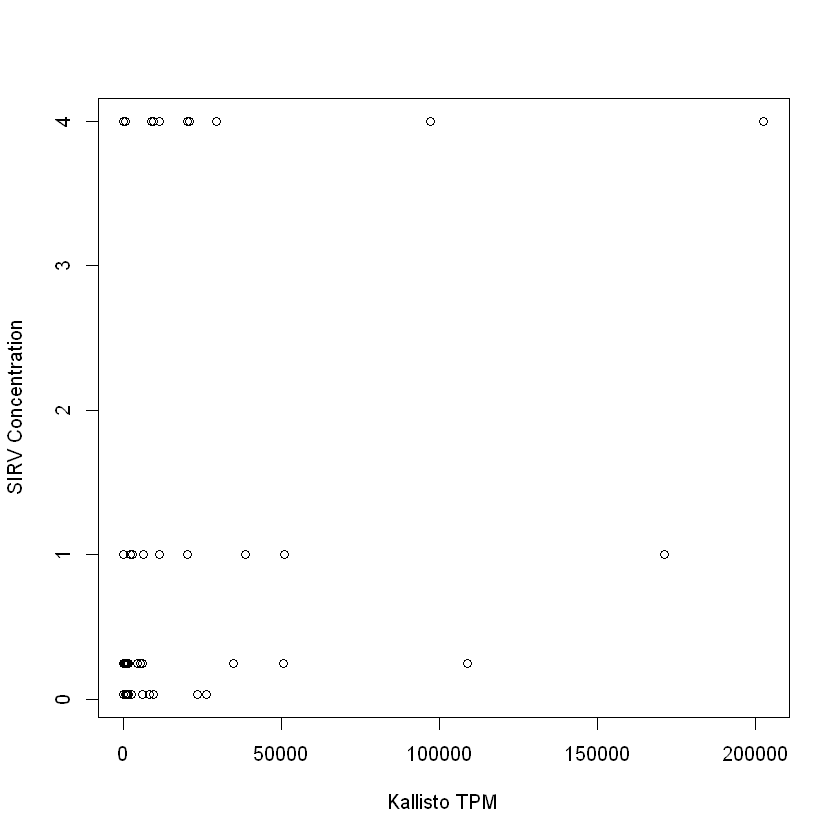

In [27]:
plot(kquant$tpm, kquant$sirv_e2, xlab='Kallisto TPM', ylab='SIRV Concentration')
# head(sirv_info)
# mean(as.numeric(sirv_info[,7]))
# mean(kquant$length)
# sd(kquant$length)

RSEM-quantified pass long read SIRVs. Was a little painful trying to get RSEM-calculate-expression to accept a bam that was aligned with BWA (gap open penalty had to be set to 9999 to prevent indels, had to remove soft and hard clippings, every alignment for a read had to be the same length) but even with the constraints of RSEM-acceptable bams, it still looks better than with kallisto.

In [2]:
setwd('~/bme/jupyter_data')
sirv_info = read.csv('SIRV-sequence-design-overview-v1.2.csv', skip=6, fill=T, stringsAsFactors=FALSE)
sirv_info = sirv_info[substr(sirv_info[,6], 1, 4) == 'SIRV',]
rquant = read.table('rsem_out_bwa.isoforms.results', header=T)
rquant$transcript_id = as.character(rquant$transcript_id)
sirv_info[,6] = as.character(sirv_info[,6])
rquant$sirv_e0 = sirv_info$E0[match(rquant$transcript_id, sirv_info[,6])]
rquant$sirv_e1 = sirv_info$E1[match(rquant$transcript_id, sirv_info[,6])]
rquant$sirv_e2 = sirv_info$E2[match(rquant$transcript_id, sirv_info[,6])]


rquant$sirv_e0 = rep(1, nrow(rquant))  # this data comes from an excel file that is poorly made for reading into R
rquant$sirv_e1[as.character(rquant$sirv_e1) == ' 1/4'] = 0.25
rquant$sirv_e1[as.character(rquant$sirv_e1) == ' 1/2'] = 0.5
rquant$sirv_e1[as.character(rquant$sirv_e1) == '2'] = 2
rquant$sirv_e1[as.character(rquant$sirv_e1) == '1'] = 1

head(rquant)

rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/32'] = 1/32
rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/4 '] = 0.25
rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/2 '] = 0.5
rquant$sirv_e2[as.character(rquant$sirv_e2) == '1'] = 1
rquant$sirv_e2[as.character(rquant$sirv_e2) == '2'] = 2
rquant$sirv_e2[as.character(rquant$sirv_e2) == '4'] = 4
rquant[rquant$transcript_id == 'SIRV502',9:11] = c(1,2,1/32)

rquant$sirv_e0 = as.numeric(rquant$sirv_e0)
rquant$sirv_e1 = as.numeric(rquant$sirv_e1)
rquant$sirv_e2 = as.numeric(rquant$sirv_e2)

cor(rquant$expected_count, rquant$sirv_e0)
cor(rquant$expected_count, rquant$sirv_e1)
cor(rquant$expected_count, rquant$sirv_e2)
cor(rquant$TPM, rquant$sirv_e2)
head(rquant)
write.table(rquant, 'sirv_rsem_quantified.txt', quote=F, row.names=F, sep='\t')


transcript_id,gene_id,length,effective_length,expected_count,TPM,FPKM,IsoPct,sirv_e0,sirv_e1,sirv_e2
SIRV101,SIRV101,1555,1519.74,1291,20798.45,20381.73,100,1,1,1
SIRV102,SIRV102,1296,1260.74,1174,22799.06,22342.25,100,1,0.5,1/4
SIRV103,SIRV103,1357,1321.74,1053,19505.48,19114.66,100,1,1,1
SIRV105,SIRV105,665,629.74,239,9292.07,9105.89,100,1,0.25,4
SIRV106,SIRV106,970,934.74,283,7412.60,7264.08,100,1,1,1
SIRV107,SIRV107,741,705.74,1228,42601.93,41748.34,100,1,0.25,4


Warning message in cor(rquant$expected_count, rquant$sirv_e0):
"the standard deviation is zero"

[1] NA

[1] -0.3347909

[1] 0.536172

[1] 0.6098262

transcript_id,gene_id,length,effective_length,expected_count,TPM,FPKM,IsoPct,sirv_e0,sirv_e1,sirv_e2
SIRV101,SIRV101,1555,1519.74,1291,20798.45,20381.73,100,1,1.00,1.00
SIRV102,SIRV102,1296,1260.74,1174,22799.06,22342.25,100,1,0.50,0.25
SIRV103,SIRV103,1357,1321.74,1053,19505.48,19114.66,100,1,1.00,1.00
SIRV105,SIRV105,665,629.74,239,9292.07,9105.89,100,1,0.25,4.00
SIRV106,SIRV106,970,934.74,283,7412.60,7264.08,100,1,1.00,1.00
SIRV107,SIRV107,741,705.74,1228,42601.93,41748.34,100,1,0.25,4.00


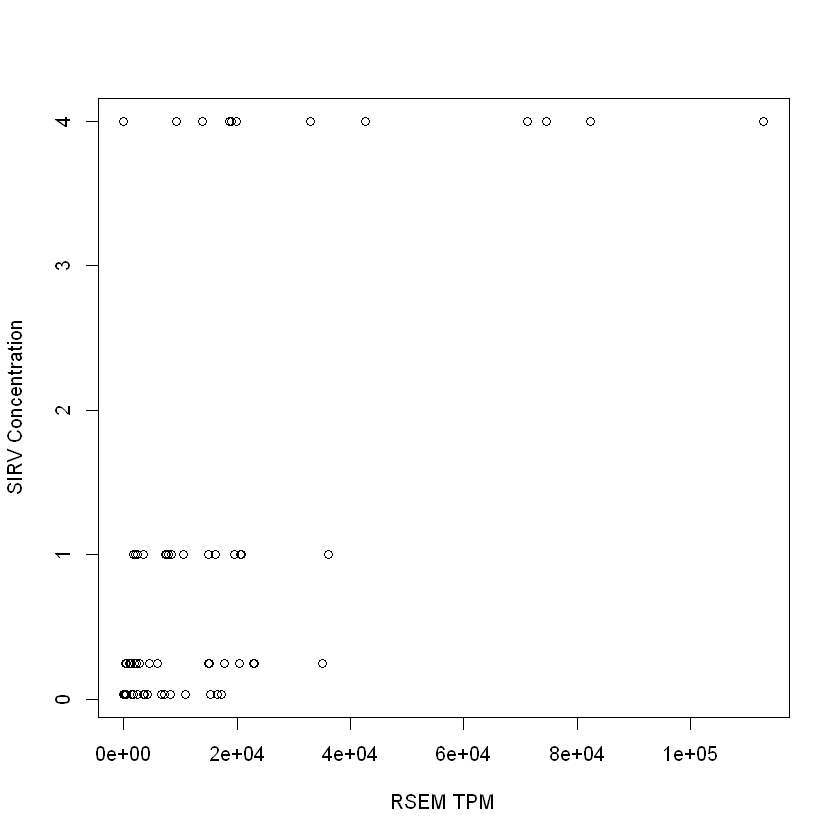

In [23]:
plot(rquant$TPM, rquant$sirv_e2, xlab='RSEM TPM', ylab='SIRV Concentration')

Using fail reads to supplement pass reads improves correlation marginally (one hundred thousandths).

transcript_id,gene_id,length,effective_length,expected_count,TPM,FPKM,IsoPct,sirv_e0,sirv_e1,sirv_e2
SIRV101,SIRV101,1555,1519.51,1316,20598.68,20267.38,100,1,1,1
SIRV102,SIRV102,1296,1260.51,1193,22510.28,22148.24,100,1,0.5,1/4
SIRV103,SIRV103,1357,1321.51,1080,19437.49,19124.87,100,1,1,1
SIRV105,SIRV105,665,629.51,248,9369.88,9219.18,100,1,0.25,4
SIRV106,SIRV106,970,934.51,291,7406.20,7287.08,100,1,1,1
SIRV107,SIRV107,741,705.51,1251,42173.49,41495.20,100,1,0.25,4


Warning message in cor(rquant$expected_count, rquant$sirv_e0):
"the standard deviation is zero"

[1] NA

[1] -0.3359676

[1] 0.5380127

[1] 0.6098538

[1] 0.4854995

[1] 0.6098538

transcript_id,gene_id,length,effective_length,expected_count,TPM,FPKM,IsoPct,sirv_e0,sirv_e1,sirv_e2
SIRV101,SIRV101,1555,1519.51,1316,20598.68,20267.38,100,1,1.00,1.00
SIRV102,SIRV102,1296,1260.51,1193,22510.28,22148.24,100,1,0.50,0.25
SIRV103,SIRV103,1357,1321.51,1080,19437.49,19124.87,100,1,1.00,1.00
SIRV105,SIRV105,665,629.51,248,9369.88,9219.18,100,1,0.25,4.00
SIRV106,SIRV106,970,934.51,291,7406.20,7287.08,100,1,1.00,1.00
SIRV107,SIRV107,741,705.51,1251,42173.49,41495.20,100,1,0.25,4.00


[1] 0

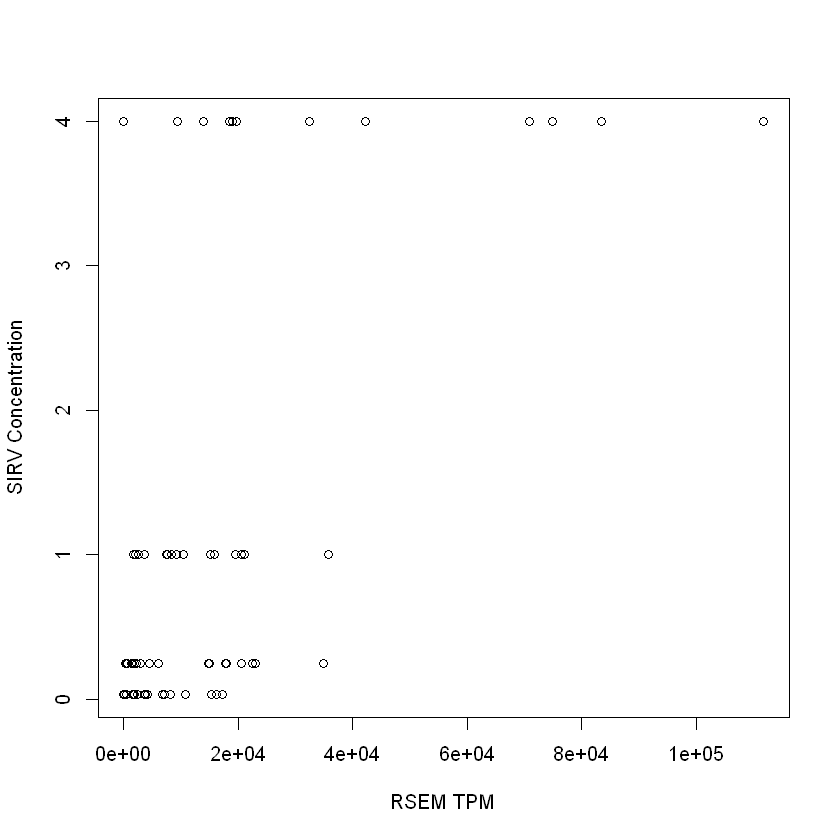

In [5]:
setwd('~/bme/jupyter_data')
sirv_info = read.csv('SIRV-sequence-design-overview-v1.2.csv', skip=6, fill=T, stringsAsFactors=FALSE)
sirv_info = sirv_info[substr(sirv_info[,6], 1, 4) == 'SIRV',]
rquant = read.table('rsem_out_fail_bwa.isoforms.results', header=T)
rquant$transcript_id = as.character(rquant$transcript_id)
sirv_info[,6] = as.character(sirv_info[,6])
rquant$sirv_e0 = sirv_info$E0[match(rquant$transcript_id, sirv_info[,6])]
rquant$sirv_e1 = sirv_info$E1[match(rquant$transcript_id, sirv_info[,6])]
rquant$sirv_e2 = sirv_info$E2[match(rquant$transcript_id, sirv_info[,6])]


rquant$sirv_e0 = rep(1, nrow(rquant))  # this data comes from an excel file that is poorly made for reading into R
rquant$sirv_e1[as.character(rquant$sirv_e1) == ' 1/4'] = 0.25
rquant$sirv_e1[as.character(rquant$sirv_e1) == ' 1/2'] = 0.5
rquant$sirv_e1[as.character(rquant$sirv_e1) == '2'] = 2
rquant$sirv_e1[as.character(rquant$sirv_e1) == '1'] = 1

head(rquant)

rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/32'] = 1/32
rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/4 '] = 0.25
rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/2 '] = 0.5
rquant$sirv_e2[as.character(rquant$sirv_e2) == '1'] = 1
rquant$sirv_e2[as.character(rquant$sirv_e2) == '2'] = 2
rquant$sirv_e2[as.character(rquant$sirv_e2) == '4'] = 4
rquant[rquant$transcript_id == 'SIRV502',9:11] = c(1,2,1/32)

rquant$sirv_e0 = as.numeric(rquant$sirv_e0)
rquant$sirv_e1 = as.numeric(rquant$sirv_e1)
rquant$sirv_e2 = as.numeric(rquant$sirv_e2)

cor(rquant$expected_count, rquant$sirv_e0)
cor(rquant$expected_count, rquant$sirv_e1)
cor(rquant$expected_count, rquant$sirv_e2)
cor(rquant$TPM, rquant$sirv_e2)
cor(rquant$TPM, rquant$sirv_e2, method = 'spearman')

cor(rquant$TPM, rquant$sirv_e2)
head(rquant)
plot(rquant$TPM, rquant$sirv_e2, xlab='RSEM TPM', ylab='SIRV Concentration')
# write.table(rquant, 'sirv_rsem_quantified_failtoo.txt', quote=F, row.names=F, sep='\t')
min(rquant$TPM)

Short read SIRV data, transcripts quantified with RSEM. Aligned using bowtie2 (RSEM's favorite) instead of BWA.

transcript_id,gene_id,length,effective_length,expected_count,TPM,FPKM,IsoPct,sirv_e0,sirv_e1,sirv_e2
SIRV101,SIRV101,1555,1436.37,54779.23,17114.77,21636.93,100,1,1,1
SIRV102,SIRV102,1296,1177.37,103363.41,39398.11,49808.12,100,1,0.5,1/4
SIRV103,SIRV103,1357,1238.37,65.00,23.56,29.78,100,1,1,1
SIRV105,SIRV105,665,546.37,8875.57,7290.07,9216.30,100,1,0.25,4
SIRV106,SIRV106,970,851.37,58990.76,31094.78,39310.83,100,1,1,1
SIRV107,SIRV107,741,622.37,24567.04,17714.40,22395.01,100,1,0.25,4


Warning message in cor(rquant$expected_count, rquant$sirv_e0):
"the standard deviation is zero"

[1] NA

[1] -0.05872944

[1] -0.1028522

[1] 0.04813476

transcript_id,gene_id,length,effective_length,expected_count,TPM,FPKM,IsoPct,sirv_e0,sirv_e1,sirv_e2
SIRV101,SIRV101,1555,1436.37,54779.23,17114.77,21636.93,100,1,1.00,1.00
SIRV102,SIRV102,1296,1177.37,103363.41,39398.11,49808.12,100,1,0.50,0.25
SIRV103,SIRV103,1357,1238.37,65.00,23.56,29.78,100,1,1.00,1.00
SIRV105,SIRV105,665,546.37,8875.57,7290.07,9216.30,100,1,0.25,4.00
SIRV106,SIRV106,970,851.37,58990.76,31094.78,39310.83,100,1,1.00,1.00
SIRV107,SIRV107,741,622.37,24567.04,17714.40,22395.01,100,1,0.25,4.00


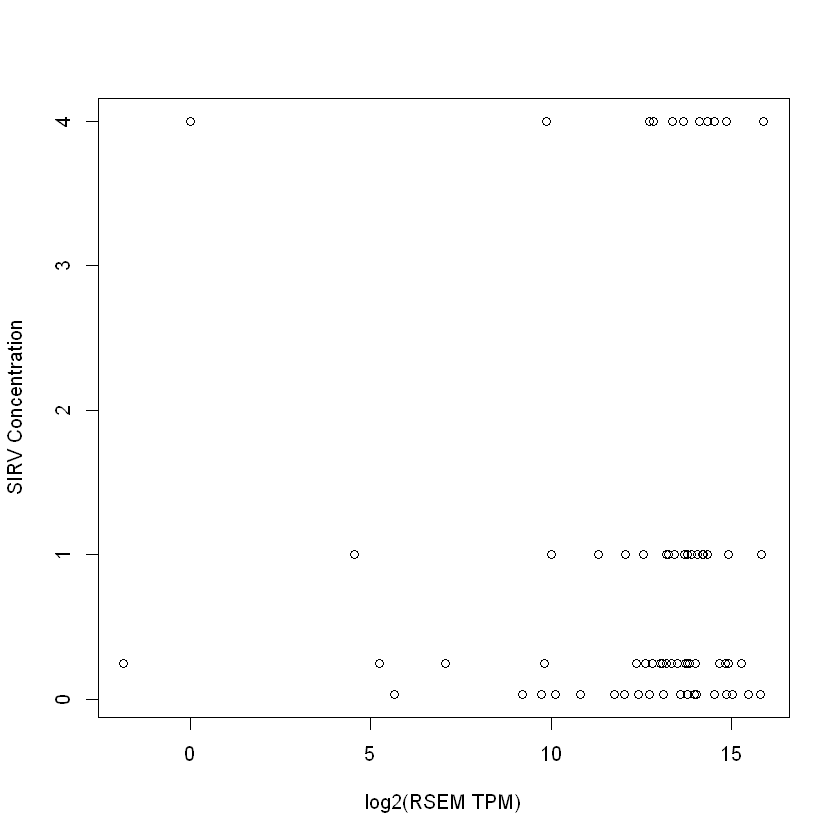

In [35]:
setwd('~/bme/jupyter_data')
sirv_info = read.csv('SIRV-sequence-design-overview-v1.2.csv', skip=6, fill=T, stringsAsFactors=FALSE)
sirv_info = sirv_info[substr(sirv_info[,6], 1, 4) == 'SIRV',]
rquant = read.table('rsem_out_short.isoforms.results', header=T)
rquant$transcript_id = as.character(rquant$transcript_id)
sirv_info[,6] = as.character(sirv_info[,6])
rquant$sirv_e0 = sirv_info$E0[match(rquant$transcript_id, sirv_info[,6])]
rquant$sirv_e1 = sirv_info$E1[match(rquant$transcript_id, sirv_info[,6])]
rquant$sirv_e2 = sirv_info$E2[match(rquant$transcript_id, sirv_info[,6])]


rquant$sirv_e0 = rep(1, nrow(rquant))  # this data comes from an excel file that is poorly made for reading into R
rquant$sirv_e1[as.character(rquant$sirv_e1) == ' 1/4'] = 0.25
rquant$sirv_e1[as.character(rquant$sirv_e1) == ' 1/2'] = 0.5
rquant$sirv_e1[as.character(rquant$sirv_e1) == '2'] = 2
rquant$sirv_e1[as.character(rquant$sirv_e1) == '1'] = 1

head(rquant)

rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/32'] = 1/32
rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/4 '] = 0.25
rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/2 '] = 0.5
rquant$sirv_e2[as.character(rquant$sirv_e2) == '1'] = 1
rquant$sirv_e2[as.character(rquant$sirv_e2) == '2'] = 2
rquant$sirv_e2[as.character(rquant$sirv_e2) == '4'] = 4
rquant[rquant$transcript_id == 'SIRV502',9:11] = c(1,2,1/32)

rquant$sirv_e0 = as.numeric(rquant$sirv_e0)
rquant$sirv_e1 = as.numeric(rquant$sirv_e1)
rquant$sirv_e2 = as.numeric(rquant$sirv_e2)

cor(rquant$expected_count, rquant$sirv_e0)
cor(rquant$expected_count, rquant$sirv_e1)
cor(rquant$expected_count, rquant$sirv_e2)
cor(rquant$TPM, rquant$sirv_e2)
head(rquant)
plot(log2(rquant$TPM), rquant$sirv_e2, xlab='log2(RSEM TPM)', ylab='SIRV Concentration')

Just counts from the BWA SAM file, no RSEM.

gene,transcript_type,sirv,transcript_id,expected_count,sirv_e0,sirv_e1,sirv_e2
SIRV410,3020,NA,SIRV410,3020,1,0.25,4
SIRV618,3,NA,SIRV618,3,1,2,1/32
SIRV408,10,NA,SIRV408,10,1,2,1/32
SIRV511,75,NA,SIRV511,75,1,2,1/32
SIRV510,82,NA,SIRV510,82,1,2,1/32
SIRV512,7,NA,SIRV512,7,1,0.5,1/4


Warning message in cor(rquant$expected_count, rquant$sirv_e0):
"the standard deviation is zero"

[1] NA

[1] -0.39211

[1] 0.7248972

gene,transcript_type,sirv,transcript_id,expected_count,sirv_e0,sirv_e1,sirv_e2
SIRV410,3020,NA,SIRV410,3020,1,0.25,4.00000
SIRV618,3,NA,SIRV618,3,1,2.00,0.03125
SIRV408,10,NA,SIRV408,10,1,2.00,0.03125
SIRV511,75,NA,SIRV511,75,1,2.00,0.03125
SIRV510,82,NA,SIRV510,82,1,2.00,0.03125
SIRV512,7,NA,SIRV512,7,1,0.50,0.25000


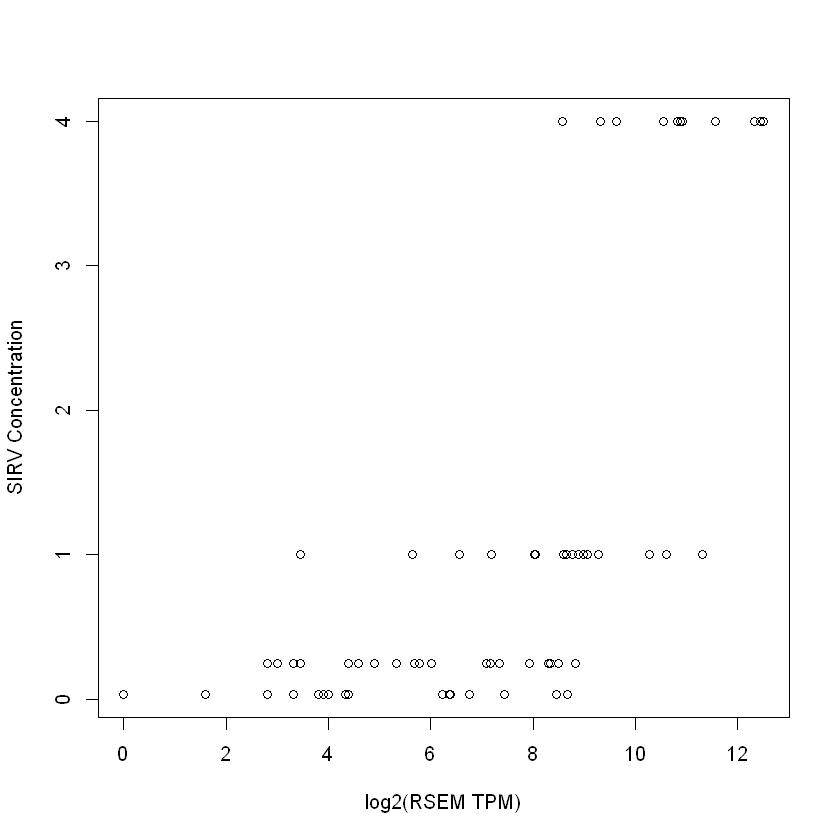

In [15]:
setwd('~/bme/jupyter_data')
sirv_info = read.csv('SIRV-sequence-design-overview-v1.2.csv', skip=6, fill=T, stringsAsFactors=FALSE)
sirv_info = sirv_info[substr(sirv_info[,6], 1, 4) == 'SIRV',]
rquant = read.table('bwa_sirv_pass.counts', header=T, fill=T)
rquant$transcript_id = as.character(rquant[,1])
rquant$expected_count = as.numeric(rquant[,2])
sirv_info[,6] = as.character(sirv_info[,6])
rquant$sirv_e0 = sirv_info$E0[match(rquant$transcript_id, sirv_info[,6])]
rquant$sirv_e1 = sirv_info$E1[match(rquant$transcript_id, sirv_info[,6])]
rquant$sirv_e2 = sirv_info$E2[match(rquant$transcript_id, sirv_info[,6])]


rquant$sirv_e0 = rep(1, nrow(rquant))  # this data comes from an excel file that is poorly made for reading into R
rquant$sirv_e1[as.character(rquant$sirv_e1) == ' 1/4'] = 0.25
rquant$sirv_e1[as.character(rquant$sirv_e1) == ' 1/2'] = 0.5
rquant$sirv_e1[as.character(rquant$sirv_e1) == '2'] = 2
rquant$sirv_e1[as.character(rquant$sirv_e1) == '1'] = 1

head(rquant)

rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/32'] = 1/32
rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/4 '] = 0.25
rquant$sirv_e2[as.character(rquant$sirv_e2) == '  1/2 '] = 0.5
rquant$sirv_e2[as.character(rquant$sirv_e2) == '1'] = 1
rquant$sirv_e2[as.character(rquant$sirv_e2) == '2'] = 2
rquant$sirv_e2[as.character(rquant$sirv_e2) == '4'] = 4
rquant[rquant$transcript_id == 'SIRV502',6:8] = c(1,2,1/32)

rquant$sirv_e0 = as.numeric(rquant$sirv_e0)
rquant$sirv_e1 = as.numeric(rquant$sirv_e1)
rquant$sirv_e2 = as.numeric(rquant$sirv_e2)

cor(rquant$expected_count, rquant$sirv_e0)
cor(rquant$expected_count, rquant$sirv_e1)
cor(rquant$expected_count, rquant$sirv_e2)
# cor(rquant$TPM, rquant$sirv_e2)
head(rquant)
plot(log2(rquant$expected_count), rquant$sirv_e2, xlab='log2(RSEM TPM)', ylab='SIRV Concentration')
write.table(rquant[,c(4, 5,8)], 'sirv_bwa_quantified.txt', quote=F, row.names=F, sep='\t')
